In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import sklearn

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X = data.drop("Outcome", axis =1).to_numpy()
Y = data['Outcome'].to_numpy()


In [11]:
X.shape

(768, 8)

In [12]:
# from sklearn.linear_model import LinearRegression
# import matplotlib.pyplot as plt
# linreg = LinearRegression()
# linreg.fit(X.reshape(-1,1),Y)
# plt.scatter(X,Y)
# plt.plot(X, linreg.predict(X.reshape(-1,1)))

### Data Preprocessing ###

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y , test_size =0.25, random_state=898, stratify=Y)

In [25]:
from sklearn.linear_model import LogisticRegression


In [27]:
log_regression = LogisticRegression()
log_regression.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_pred = log_regression.predict(x_test)

### Evaluation Metrics ###
### 1 Confusion Metrics 

In [29]:
from sklearn.metrics import confusion_matrix


In [31]:
matrix = confusion_matrix(y_test , y_pred, labels = [0,1])

In [32]:
matrix

array([[112,  13],
       [ 33,  34]])

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

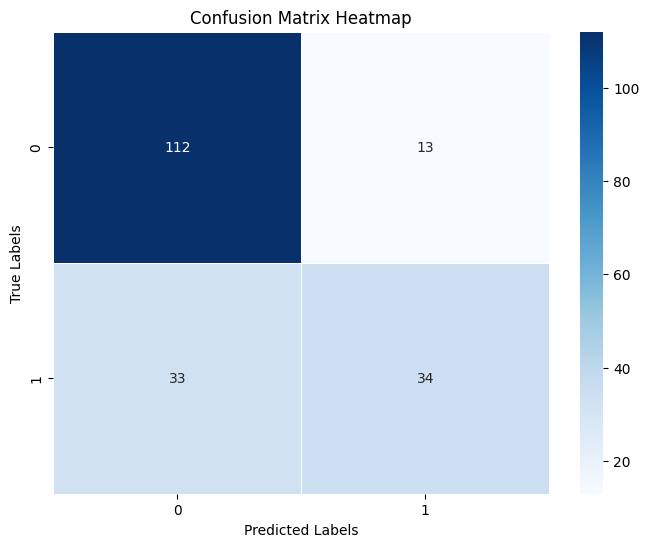

In [36]:
# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Accuracy Metrics ###


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test , y_pred)

0.7604166666666666

### Accuracy Paradox   &  Recall Score

In [41]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score:", precision_score(y_test, y_pred))

Precision Score: 0.723404255319149


In [43]:
print("Recall Score:" , recall_score(y_test, y_pred))

Recall Score: 0.5074626865671642


### F1 Score ###


In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5964912280701754